In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
plt.rcParams['figure.figsize'] = [10,10]

In [40]:
times = []
amplitudes = []
init_time = 0
first_row = True
with open('solar_flares_test.csv', newline='') as csvfile:
    data_list = csv.reader(csvfile, delimiter = ',')
    for row in data_list:
        if first_row:
            first_row = False
        else:
            if not init_time:
                init_time = datetime.fromisoformat(row[1]).timestamp()
            
            
            amp = row[3]
            if amp[0] == 'A': # and not float(amp[1:]):
                pass
            else:
#                 if amp[0] == 'A':
#                     cat = float(amp[1:])
#                     amp_conv = cat*1e-8
                if amp[0] == 'B':
                    cat = float(amp[1:])
                    amp_conv = cat*1e-7
                elif amp[0] == 'C':
                    cat = float(amp[1:])
                    amp_conv = cat*1e-6
                elif amp[0] == 'M':
                    cat = float(amp[1:])
                    amp_conv = cat*1e-5
                elif amp[0] == 'X':
                    cat = float(amp[1:])
                    amp_conv = cat*1e-4
                else:
                    print('problem')
                amplitudes.append(amp_conv)
                times.append(datetime.fromisoformat(row[1]).timestamp() - init_time)
times = np.array(times)
amplitudes = np.array(amplitudes)

In [31]:
amplitudes = amplitudes[(times/3600/24/365 > 5)&(times/3600/24/365 < 13)]
times = times[(times/3600/24/365 > 5)&(times/3600/24/365 < 13)]

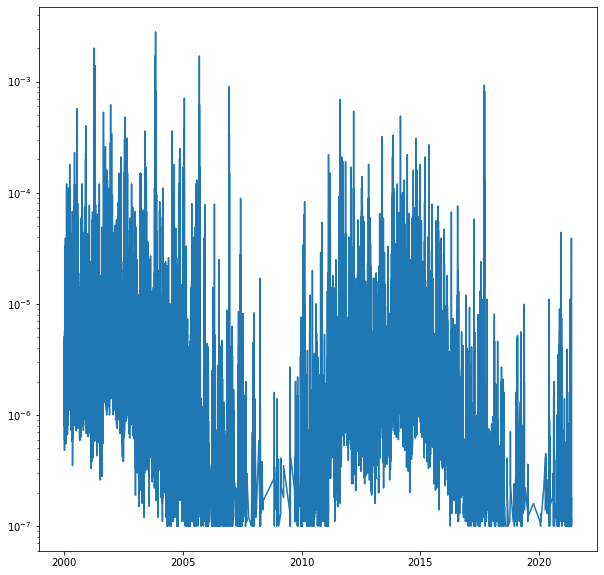

In [41]:
plt.semilogy(times/3600/24/365 + 2000, amplitudes)

In [42]:
points = np.logspace(np.log10(min(amplitudes)), -3, 100)
CWT = []
for item in points:
    WT = []
    indx = [i for i, v in enumerate(amplitudes) if v> item]
    WT = times[indx[1:]] - times[np.roll(indx, 1)[1:]] 
    CWT.append(np.mean(WT))

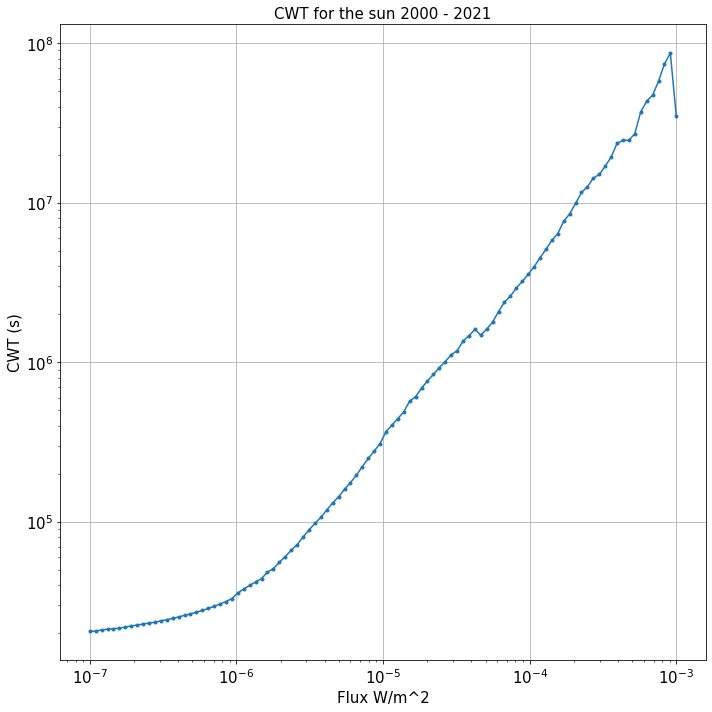

In [47]:
plt.title('CWT for the sun 2000 - 2021', fontsize = 15)
plt.plot(points, CWT, marker='.')
plt.xlabel('Flux W/m^2', fontsize = 15)
plt.ylabel('CWT (s)', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
# plt.xlim(2.7e-5, 2.9e-5)
# plt.ylim(1e6, 2e6)
plt.grid(which = 'major')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()

In [45]:
len(amplitudes[(amplitudes > 1e-5)&(amplitudes < 1e-4)])

1683

In [46]:
np.savez('sunpy_CWT.npz', points = points, CWT = CWT)